In [0]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Val"

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

# CNN MODEL


In [0]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['accuracy'])


In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 54, 54, 64)       

# Train

In [0]:
train_datagen = image.ImageDataGenerator(
    rescale = 1.0/255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_dataset = image.ImageDataGenerator(rescale=1.0/255)

In [21]:
train_datagen = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 224 images belonging to 2 classes.


In [23]:
train_datagen.class_indices

{'Covid': 0, 'Normal': 1}

In [24]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size=(224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [26]:
hist = model.fit_generator(
    train_datagen,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/10
8/8 [==============================] - 91s 11s/step - loss: 0.8575 - accuracy: 0.5625 - val_loss: 0.6825 - val_accuracy: 0.5833
Epoch 2/10
8/8 [==============================] - 79s 10s/step - loss: 0.5657 - accuracy: 0.7266 - val_loss: 0.3823 - val_accuracy: 0.9333
Epoch 3/10
8/8 [==============================] - 78s 10s/step - loss: 0.4759 - accuracy: 0.7656 - val_loss: 0.4013 - val_accuracy: 0.9667
Epoch 4/10
8/8 [==============================] - 78s 10s/step - loss: 0.3100 - accuracy: 0.8945 - val_loss: 0.1237 - val_accuracy: 0.9667
Epoch 5/10
8/8 [==============================] - 78s 10s/step - loss: 0.2535 - accuracy: 0.8906 - val_loss: 0.2724 - val_accuracy: 0.9667
Epoch 6/10
8/8 [==============================] - 78s 10s/step - loss: 0.1679 - accuracy: 0.9492 - val_loss: 0.3920 - val_accuracy: 0.8833
Epoch 7/10
8/8 [==============================] - 84s 10s/step - loss: 0.2902 - accuracy: 0.8984 - val_loss: 0.3201 - val_accuracy: 0.9667
Epoch 8/10
8/8 [===========

In [0]:
model.save("cnn_v1.h5")

In [32]:
model.evaluate_generator(train_datagen)

[0.0915176272392273, 0.9642857313156128]

In [33]:
model.evaluate_generator(validation_generator)

[0.04530800133943558, 0.9833333492279053]

# TEST

In [0]:
model = load_model('cnn_v1.h5')

In [0]:
import os 

In [38]:
train_datagen.class_indices

{'Covid': 0, 'Normal': 1}

In [0]:
y_actual = []
y_test = []

In [0]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img = image.load_img("./CovidDataset/Val/Normal/" + i, target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [0]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img = image.load_img("./CovidDataset/Val/Covid/" + i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [56]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)
print(y_actual.shape,y_test.shape)

(60,) (60,)


In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
cm = confusion_matrix(y_actual,y_test)

In [0]:
import seaborn as sns

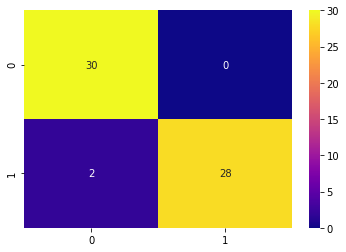

In [60]:
sns.heatmap(cm,cmap="plasma",annot=True)

# New Section